In [1]:
import numpy as np
from pandas_datareader import data as wb

import matplotlib.pyplot as plt


In [2]:
PG = wb.DataReader("PG", data_source="yahoo", start = "1995-1-1")

In [3]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,7.820025
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,7.757339
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.647637
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,7.663312
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,7.631969


In [4]:
PG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-10-26,132.570007,130.399994,130.649994,131.779999,6612800.0,131.779999
2022-10-27,133.119995,131.500000,132.000000,131.880005,6676700.0,131.880005
2022-10-28,135.509995,132.919998,133.169998,135.220001,6995700.0,135.220001
2022-10-31,135.669998,134.259995,135.199997,134.669998,8346300.0,134.669998
2022-11-01,136.259995,133.845001,134.699997,134.839996,5266573.0,134.839996


In [5]:
### SIMPLE RATE OF RETURN ###


In [8]:
PG["Simple_return"]= (PG["Adj Close"]/PG["Adj Close"].shift(1))-1
print( PG["Simple_return"])

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014142
1995-01-06    0.002050
1995-01-09   -0.004090
                ...   
2022-10-26    0.007030
2022-10-27    0.000759
2022-10-28    0.025326
2022-10-31   -0.004067
2022-11-01    0.001262
Name: Simple_return, Length: 7009, dtype: float64


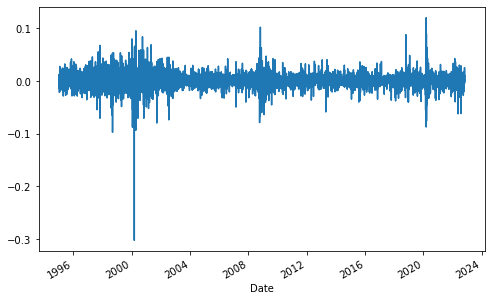

In [9]:
### simple returns chart
PG["Simple_return"].plot(figsize=(8, 5))
plt.show()

In [11]:
###average daily return with mean function
avg_returns_d= PG["Simple_return"].mean()
avg_returns_d

0.0005066667967721198

In [12]:
###average annual return with mean function
avg_returns_a= PG["Simple_return"].mean()*250
avg_returns_a


0.12666669919302995

In [14]:
print (str(round(avg_returns_a, 5)*100) + " %")

12.667 %


In [15]:
###log returns calculation

PG.head()

,High,Low,Open,Close,Volume,Adj Close,Simple_return
Date,,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,7.820025,NaN
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,7.757339,-0.008016
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.647637,-0.014142
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,7.663312,0.002050
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,7.631969,-0.004090


In [20]:
PG["Log_return"]= np.log(PG["Adj Close"]/PG["Adj Close"].shift(1))
print(PG["Log_return"])

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014243
1995-01-06    0.002048
1995-01-09   -0.004098
                ...   
2022-10-26    0.007006
2022-10-27    0.000759
2022-10-28    0.025011
2022-10-31   -0.004076
2022-11-01    0.001262
Name: Log_return, Length: 7009, dtype: float64


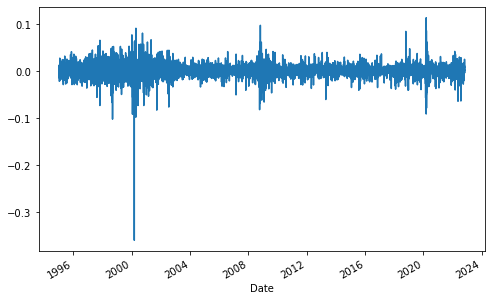

In [22]:
PG["Log_return"].plot(figsize=(8,5))
plt.show()

In [24]:
log_return_d = PG["Log_return"].mean()
log_return_d

0.00040630722815962277

In [25]:
log_return_a = PG["Log_return"].mean()*250
log_return_a

0.1015768070399057

In [34]:
print(str(round(log_return_a, 5)*100) + " %")

10.158000000000001 %


In [35]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [36]:
tickers = ["PG", "MSFT", "F", "GE"]
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source = "yahoo", start = "1995-1-1")["Adj Close"]
    

In [37]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7011 entries, 1995-01-03 to 2022-11-03
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      7011 non-null   float64
 1   MSFT    7011 non-null   float64
 2   F       7011 non-null   float64
 3   GE      7011 non-null   float64
dtypes: float64(4)
memory usage: 273.9 KB


In [38]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.820024,2.359438,4.264751,32.767963
1995-01-04,7.757337,2.376590,4.379500,32.767963
1995-01-05,7.647643,2.337389,4.341249,32.848289
1995-01-06,7.663310,2.376590,4.341249,32.687656
1995-01-09,7.631965,2.361890,4.417746,32.366386


In [39]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2022-10-28,135.220001,235.869995,13.26,78.330002
2022-10-31,134.669998,232.130005,13.37,77.809998
2022-11-01,134.880005,228.169998,13.40,78.209999
2022-11-02,132.940002,220.100006,13.06,77.400002
2022-11-03,131.419998,219.459900,13.12,77.010002


### Normalization to 100: P(t)/P(0) *100 

In [ ]:
mydata.iloc[0]

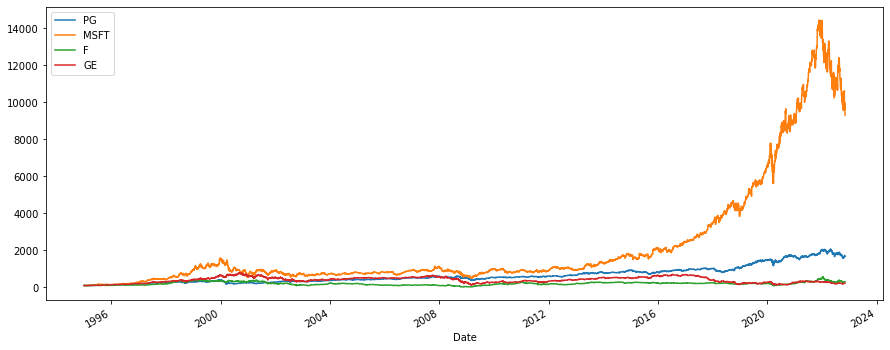

In [43]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

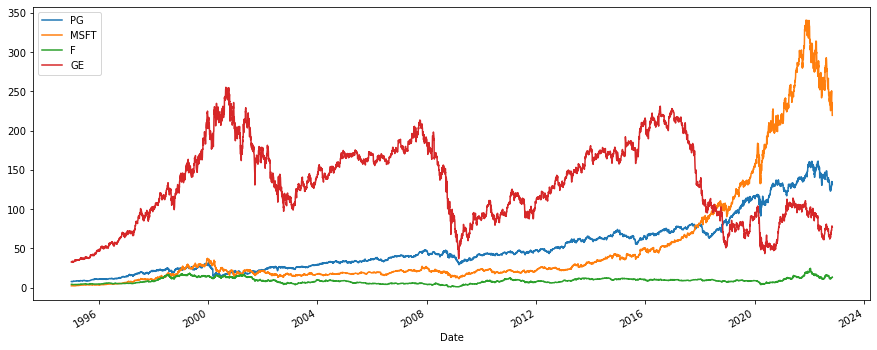

In [44]:
mydata.plot(figsize=(15,6))
plt.show()

In [45]:
mydata.loc["1995-01-03"]

PG       7.820024
MSFT     2.359438
F        4.264751
GE      32.767963
Name: 1995-01-03 00:00:00, dtype: float64

In [47]:
mydata.iloc[0]

PG       7.820024
MSFT     2.359438
F        4.264751
GE      32.767963
Name: 1995-01-03 00:00:00, dtype: float64

### Calculating the return of a portfolio of securities

In [50]:
# calculate simple returns
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017621,-0.009828


In [51]:
# set the weights
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [52]:
# dot function calculate matrix (each company with respective weight)
np.dot(returns, weights)

array([        nan,  0.00653983, -0.00922953, ..., -0.00202887,
       -0.02137032, -0.00369666])

In [53]:
# calculate annual returns
annual_returns = returns.mean() * 250
annual_returns

PG      0.125720
MSFT    0.210995
F       0.121276
GE      0.082166
dtype: float64

In [54]:
# dot function calculate matrix (each company with respective weight)
np.dot(annual_returns, weights)

0.13503918640586246

In [55]:
# change calculation to string with rounded number
pfolio_1=str(round(np.dot(annual_returns, weights), 5) *100) + " %"
print (pfolio_1)

13.504 %


In [56]:
# set different weights
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])


In [57]:
# change calculation to string with rounded number and compare numbers with different options of investments
pfolio_2=str(round(np.dot(annual_returns, weights_2), 5) *100) + " %"
print (pfolio_1)
print (pfolio_2)

13.504 %
15.699 %


### Calculating the return of Indices

In [69]:
tickers = ["^GSPC", "^IXIC", "^GDAXI", "\^FTSE"]
ind_data = pd.DataFrame()
for t in tickers:
    ind_data[t] = wb.DataReader(t, data_source = "yahoo", start = "1997-1-1")["Adj Close"]

In [70]:
ind_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6505 entries, 1997-01-02 to 2022-11-03
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^GSPC   6505 non-null   float64
 1   ^IXIC   6505 non-null   float64
 2   ^GDAXI  6388 non-null   float64
 3   \^FTSE  6383 non-null   float64
dtypes: float64(4)
memory usage: 254.1 KB


In [71]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI,\^FTSE
Date,,,,
1997-01-02,737.010010,1280.699951,2820.810059,4057.399902
1997-01-03,748.030029,1310.680054,2863.260010,4089.500000
1997-01-06,747.650024,1316.400024,2890.199951,4106.500000
1997-01-07,753.229980,1327.729980,2876.340088,4078.800049
1997-01-08,748.409973,1320.349976,2904.080078,4087.500000


In [72]:
ind_data.tail()

,^GSPC,^IXIC,^GDAXI,\^FTSE
Date,,,,
2022-10-28,3901.060059,11102.450195,13243.330078,7047.700195
2022-10-31,3871.979980,10988.150391,13253.740234,7094.500000
2022-11-01,3856.100098,10890.849609,13338.740234,7186.200195
2022-11-02,3759.689941,10524.799805,13256.740234,7144.100098
2022-11-03,3727.439941,10398.743164,13082.339844,7142.959961


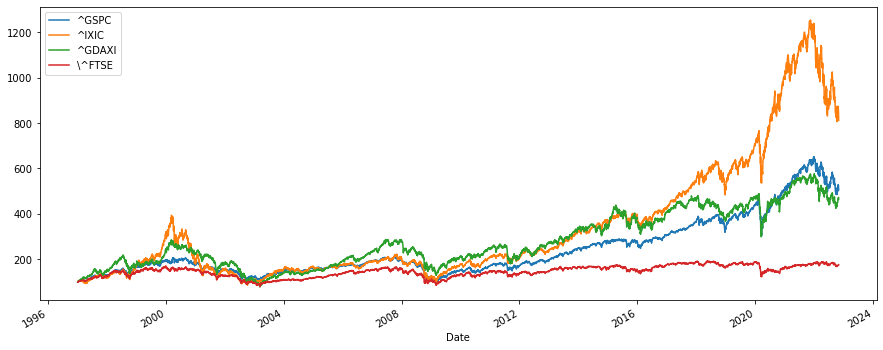

In [73]:
#normalize dataset we use iloc
(ind_data / ind_data.iloc[0] * 100).plot(figsize=(15,6));
plt.show()

In [74]:
ind_returns = (ind_data / ind_data.shift(1))-1

ind_returns.tail()

,^GSPC,^IXIC,^GDAXI,\^FTSE
Date,,,,
2022-10-28,0.024626,0.028703,0.002430,-0.003676
2022-10-31,-0.007454,-0.010295,0.000786,0.006640
2022-11-01,-0.004101,-0.008855,0.006413,0.012926
2022-11-02,-0.025002,-0.033611,-0.006148,-0.005858
2022-11-03,-0.008578,-0.011977,-0.013156,-0.000160


In [75]:
annual_returns = ind_returns.mean() * 250
annual_returns

^GSPC     0.081638
^IXIC     0.112313
^GDAXI    0.071689
\^FTSE    0.036369
dtype: float64

In [76]:
tickers = ["^GSPC", "PG", "^DJI"]
data_2 = pd.DataFrame()
for t in tickers:
    data_2[t] = wb.DataReader(t, data_source = "yahoo", start = "1997-1-1")["Adj Close"]

In [77]:
data_2.tail()

,^GSPC,PG,^DJI
Date,,,
2022-10-28,3901.060059,135.220001,32861.800781
2022-10-31,3871.979980,134.669998,32732.949219
2022-11-01,3856.100098,134.880005,32653.199219
2022-11-02,3759.689941,132.940002,32147.759766
2022-11-03,3736.969971,131.800003,32013.089844


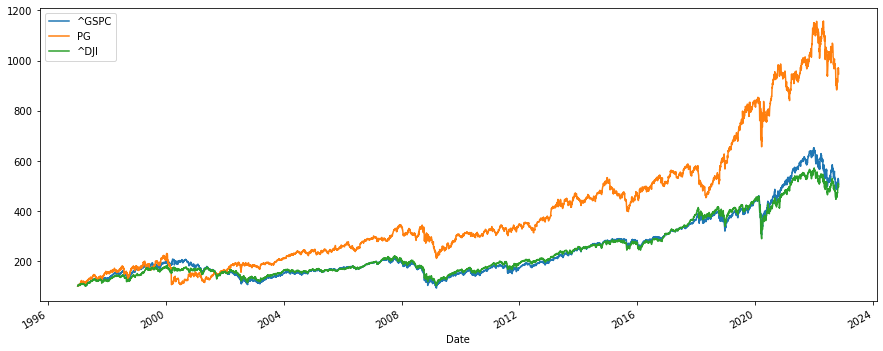

In [78]:
(data_2 / data_2.iloc[0] * 100).plot(figsize=(15, 6));
plt.show()

### Calculating risk of security

In [79]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [80]:

tickers = ["PG", "BEI.DE"]

sec_data = pd.DataFrame()

for t in tickers:
    sec_data[t] = wb.DataReader(t, data_source = "yahoo", start = "2017-1-1")["Adj Close"]

In [81]:
sec_data.tail()

,PG,BEI.DE
Date,,
2022-10-28,135.220001,96.500000
2022-10-31,134.669998,97.180000
2022-11-01,134.880005,95.400002
2022-11-02,132.940002,94.000000
2022-11-03,131.979996,94.099998


In [82]:
sec_returns = np.log(sec_data / sec_data.shift(1))

In [83]:
sec_returns

,PG,BEI.DE
Date,,
2017-01-03,NaN,NaN
2017-01-04,0.003557,-0.007798
2017-01-05,0.006605,0.003968
2017-01-06,-0.000352,-0.003223
2017-01-09,-0.007437,0.002852
...,...,...
2022-10-28,0.025011,-0.003517
2022-10-31,-0.004076,0.007022
2022-11-01,0.001558,-0.018486


### PG

In [84]:
# return mean
sec_returns["PG"].mean()

0.0004193148285573399

In [85]:
# annual return
sec_returns["PG"].mean()*250

0.10482870713933497

In [86]:
# standard deviation 
sec_returns["PG"].std()

0.012931451631193837

In [87]:
# standard deviation annually
sec_returns["PG"].std()*250**0.5

0.20446420303436108

### Beiersdorf

In [88]:
sec_returns["BEI.DE"].mean()

0.00012918170006861644

In [89]:
sec_returns["BEI.DE"].mean()*250

0.03229542501715411

In [90]:
sec_returns["BEI.DE"].std()

0.012838042517249517

In [91]:
sec_returns["BEI.DE"].std()*250**0.5

0.20298727526294985

In [92]:
print(sec_returns["PG"].mean()*250)
print(sec_returns["BEI.DE"].mean()*250)

0.10482870713933497
0.03229542501715411


In [93]:
sec_returns[["PG", "BEI.DE"]].mean()*250

PG        0.104829
BEI.DE    0.032295
dtype: float64

In [95]:
sec_returns[["PG", "BEI.DE"]].std()*250**0.5

PG        0.204464
BEI.DE    0.202987
dtype: float64

### Covariance and Correlation

In [97]:
# calculate variance with var() function
PG_var = sec_returns["PG"].var()
PG_var

0.00016722244128990573

In [98]:
#  calculate variance with var() function
BEI_var = sec_returns["BEI.DE"].var()
BEI_var

0.0001648153356747063

In [99]:
# annualize variance
PG_var_a = sec_returns["PG"].var()*250
PG_var_a

0.041805610322476434

In [100]:
BEI_var_a = sec_returns["BEI.DE"].var()*250
BEI_var_a

0.041203833918676575

In [101]:
# to create covariance matrix we use cov() function which create matrix automatically
cov_matrix = sec_returns.cov()
cov_matrix

,PG,BEI.DE
PG,0.000167,0.000047
BEI.DE,0.000047,0.000165


In [102]:
# create annual covariance matrix (data shows each stock variance and common covariance between stocks)
cov_matrix_a = sec_returns.cov()*250
cov_matrix_a

,PG,BEI.DE
PG,0.041806,0.011862
BEI.DE,0.011862,0.041204


In [104]:
# to calculate correlations we use corr() method
# this is correlation between returns not correlation of prices. It focuses on returns of your portfolio.

corr_matrix = sec_returns.corr()
corr_matrix

,PG,BEI.DE
PG,1.000000,0.286729
BEI.DE,0.286729,1.000000


### Calculating portfolio Risk

In [105]:
weights = np.array([0.5, 0.5])

In [107]:
#Portfolio variance. Dot product of two arrays
pfolio_var = np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))
pfolio_var

0.02668338978606793

In [109]:
#Porfolio Volatility

pfolio_vol = np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights)) **0.5
pfolio_vol

0.16335051204715562

In [111]:
print(str(round(pfolio_vol, 5)*100) + " %")

16.335 %


### Calculating diversifiable and Non-diversifiable Risk of Portfolio

In [112]:
weights = np.array([0.5, 0.5])

In [115]:
weights[0]

0.5

In [114]:
weights[1]

0.5

In [121]:
#Diversifiable risk (dr). Changing to float to avoid doule brackets on [["PG"]]
float(PG_var_a)
PG_var_a = sec_returns["PG"].var() * 250
PG_var_a

0.041805610322476434

In [122]:
float(BEI_var_a)
BEI_var_a = sec_returns["BEI.DE"].var() * 250
BEI_var_a

0.041203833918676575

In [129]:
# diversifiable risk = portfolio variance - weighted annual variances
dr  = pfolio_var - (weights[0]**2*PG_var_a) - (weights[1] ** 2 * BEI_var_a)
dr

0.005931028725779677

In [130]:
print (str(round(dr*100, 3)) + " %")

0.593 %


In [134]:
#NON - Diversifiable risk (dr). Portfolio variance - diversifiable risk = summed weighted annual variances

n_dr_1 = pfolio_var - dr
n_dr_1.round(3)

0.021

In [135]:
n_dr_2 = (weights[0] ** 2 * PG_var_a) + (weights[1]**2*BEI_var_a)
n_dr_2.round(3)

0.021

In [138]:
n_dr_1.round(3) == n_dr_2.round(3)


True

In [140]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

%matplotlib inline

market_indices = pd.read_csv("C:/Users/Vartotojas/Desktop/365DSc-Indices-2000-2021.csv", index_col = "Date")
market_indices.head()

,^GSPC,^IXIC,^DJI
Date,,,
2000-01-03,1455.219971,4131.149902,11357.509766
2000-01-04,1399.420044,3901.689941,10997.929688
2000-01-05,1402.109985,3877.540039,11122.650391
2000-01-06,1403.449951,3727.129883,11253.259766
2000-01-07,1441.469971,3882.620117,11522.559570


In [142]:
(market_indices / market_indices.iloc[0] * 100)

,^GSPC,^IXIC,^DJI
Date,,,
2000-01-03,100.000000,100.000000,100.000000
2000-01-04,96.165533,94.445615,96.833988
2000-01-05,96.350381,93.861035,97.932123
2000-01-06,96.442461,90.220156,99.082105
2000-01-07,99.055126,93.984005,101.453222
...,...,...,...
2021-05-17,286.093520,323.857767,302.247498
2021-05-18,283.656778,322.032363,299.895495
2021-05-19,282.821859,321.937972,298.446048


### Running Regression in Python

In [144]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt

In [145]:
data = pd.read_excel("C:/Users/Vartotojas/Desktop/Financial analysis/Housing.xlsX")

In [146]:
data.head()

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995


In [147]:
data[["House Price", "House Size (sq.ft.)"]]

,House Price,House Size (sq.ft.)
0,1116000,1940
1,860000,1300
2,818400,1420
3,1000000,1680
4,640000,1270
5,1010000,1850
6,600000,1000
7,700000,1100
8,1100000,1600
9,570000,1000


### Univariate Regression

In [148]:
x = data["House Size (sq.ft.)"]
y = data["House Price"]

In [149]:
x


0     1940
1     1300
2     1420
3     1680
4     1270
5     1850
6     1000
7     1100
8     1600
9     1000
10    2150
11    1900
12    2200
13    1100
14     860
15    1325
16    1350
17    1600
18     950
19    1250
Name: House Size (sq.ft.), dtype: int64

In [150]:
y

0     1116000
1      860000
2      818400
3     1000000
4      640000
5     1010000
6      600000
7      700000
8     1100000
9      570000
10     860000
11    1085000
12    1250000
13     850000
14     640000
15     900000
16     730000
17     750000
18     650000
19     680000
Name: House Price, dtype: int64

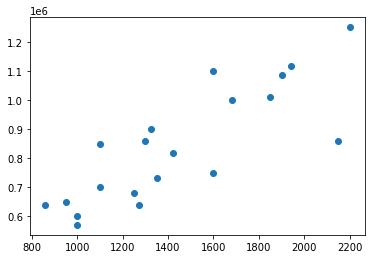

In [151]:
plt.scatter(x,y)
plt.show()

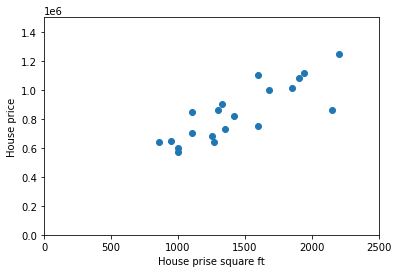

In [155]:
plt.scatter(x,y)
plt.axis([0, 2500, 0, 1500000])
plt.ylabel("House price")
plt.xlabel("House prise square ft")
plt.show()

In [156]:
### Computing Alpha, Beta, adn R squared in Python (when R squred regression is higher than 30 percent, then indicator has a predictive value)
x1 = sm.add_constant(x)

reg = sm.OLS(y, x1).fit()

In [157]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           8.13e-06
Time:                        14:52:26   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
House Size (sq.ft.)   401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [158]:
# expected value of Y

260800 + 402 * 1000

662800

In [159]:
# Alpha, BEta, R^2:

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

In [160]:
slope

401.91628631922595

In [161]:
intercept

260806.2360560964

In [162]:
r_value

0.8235775534696924

In [163]:
r_value ** 2

0.678279986579124

In [164]:
p_value

8.129642377231308e-06

In [165]:
std_err

65.24299510636492

In [168]:
#expected value of Y
intercept + slope *1000

662722.5223753224

### Obtaining the Efficient Frontier in Python

In [169]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

%matplotlib inline

In [175]:


assets = ["PG", "^GSPC"]
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a]= wb.DataReader(a, data_source = "yahoo", start = "2010-1-1", end = "2017-1-1")["Adj Close"] 

In [176]:
pf_data.tail()

,PG,^GSPC
Date,,
2016-12-23,71.897636,2263.790039
2016-12-27,71.592987,2268.879883
2016-12-28,71.144470,2249.919922
2016-12-29,71.381432,2249.260010
2016-12-30,71.152931,2238.830078


<AxesSubplot:xlabel='Date'>

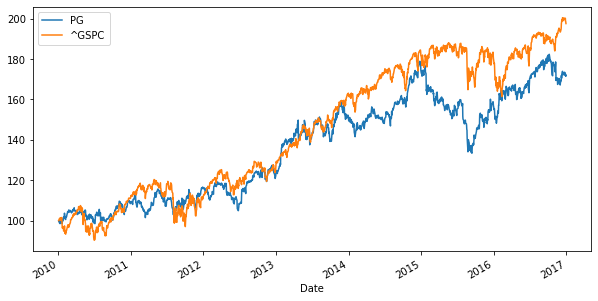

In [177]:
(pf_data/pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [178]:
# log returns

log_returns = np.log(pf_data / pf_data.shift(1))

In [179]:
log_returns.mean() * 250

PG       0.076745
^GSPC    0.096691
dtype: float64

In [180]:
#calculate coviarence
log_returns.cov() * 250

,PG,^GSPC
PG,0.020281,0.012829
^GSPC,0.012829,0.024012


In [181]:
# well correlated if correlation is higher than 30 percennt
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.581347
^GSPC,0.581347,1.000000


In [182]:
#calculate num of assets

num_assets = len(assets)

In [183]:
num_assets

2

In [184]:
#generate 2 random weights
arr = np.random.random(2)
arr

array([0.81545501, 0.03757888])

In [185]:
# the sum not equal to 1. It is need to have setting set to be equal to 1
arr[0] + arr[1]

0.8530338894161604

In [186]:
# In this case generate 2 random weights, 2nd line make the sum of weights to be equal to 1
weights = arr = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.77147068, 0.22852932])

In [187]:
weights[0] + weights[1]

1.0

### Expected portfolio return

In [188]:
np.sum(weights * log_returns.mean()) * 250

0.08130351767784673

### Expected portfolio variance

In [189]:
np.dot(weights.T, np.dot(log_returns.cov()*250, weights))

0.01784831430430509

### Expected Portfolio Volatlity

In [190]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.13359758345234052

In [191]:
# we generate 1000 options of two chosen assets to invest

In [202]:
#for coding lines we insert the same formules we did before portfolio return/variance/volatility
pfolio_returns = []
pfolio_vol = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_vol.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

# we change lists to arrays (it helps to plot results on a graph)
pfolio_returns = np.array(pfolio_returns)
pfolio_vol = np.array(pfolio_vol)
    


In [198]:
portfolios = pd.DataFrame({"Return": pfolio_returns, "VOlatility": pfolio_vol})

In [199]:
portfolios.head()

,Return,VOlatility
0,0.086154,0.131899
1,0.084720,0.131534
2,0.084482,0.131544
3,0.089095,0.134897
4,0.086792,0.132295


In [200]:
portfolios.tail()

,Return,VOlatility
995,0.093867,0.145666
996,0.087581,0.132982
997,0.081072,0.133884
998,0.087873,0.133291
999,0.093795,0.145457


Text(0, 0.5, 'expected return')

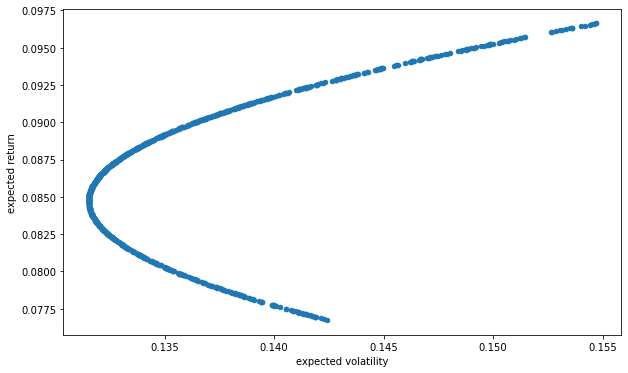

In [201]:
# Plot Efficient Frontier results
portfolios.plot(x="VOlatility", y="Return", kind="scatter", figsize=(10,6));
plt.xlabel("expected volatility")
plt.ylabel("expected return")

### Calculating the BETA of a stock

In [203]:
#Beta=0 stock no relatioship with market, Beta<1 stock less dependedant on marker less risky it is called defensive stock, Beta>1 stock more risky and volatile but gets better return when market is up

In [209]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
tickers = ["PG", "^GSPC"]

data = pd.DataFrame()

for t in tickers:
    data[t] = wb.DataReader(t, data_source = "yahoo", start = "2012-1-1", end= "2016-12-31")["Adj Close"]

In [210]:
sec_returns = np.log(data / data.shift(1))

In [211]:
cov = sec_returns.cov() * 250
cov

,PG,^GSPC
PG,0.020409,0.010078
^GSPC,0.010078,0.016362


In [212]:
cov_with_market = cov.iloc[0,1]
cov_with_market

0.010078107584267216

In [213]:
market_var = sec_returns["^GSPC"].var() * 250
market_var

0.016361631002308474

In [ ]:
# calculate Beta (in this case BETA<1, it means PG stock is defensive type. It gets less return when the market moving up and it lose less in the bear market)

In [214]:
PG_beta = cov_with_market / market_var
PG_beta

0.6159598381631567

### Calculating the Expected Return of Stock (CAPM)

In [215]:
#CAPM capital asset pricing model
# we take free risk rate of US 10 year bonds yiels 2,5 percent. Historical risk premium is 5 percent or according to formula (expected return of market minus free risk rate)
# the result we get is the percent of return we expect from investment
PG_er = 0.025 + PG_beta * 0.05
PG_er

0.05579799190815784

### Sharpe ratio

In [216]:
# expected return minus free risk rate divided by standard deviation of annualized stock 
sharpe = (PG_er - 0.025) / (sec_returns["PG"].std() * 250 ** 0.5)
sharpe

0.2155813717342262

### Running a Multivariate Regression in Python

In [ ]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt

In [256]:
data = pd.read_excel("C:/Users/Vartotojas/Desktop/Financial analysis/Housing.xlsX")

In [257]:
data.head()

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995


In [258]:
x = data[["House Size (sq.ft.)", "Number of Rooms", "Year of Construction"]]
y = data["House Price"]

In [260]:
x1 = sm.add_constant(x)
reg = sm.OLS(y, x1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     14.90
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           6.82e-05
Time:                        23:41:20   Log-Likelihood:                -258.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      16   BIC:                             528.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.452e+06    5.4e+06     -1.752      0.099   -2.09e+07    1.99e+06
House Size (sq.ft.)    341.8271    179.666      1.903      0.075     -39.049     722.703
Number of Rooms        1.16e+04   3.74e+04      0.310      0.760   -6.77e+04    9.08e+04
Year of Construction  4863.5761   2697.969      1.803      0.090    -855.862    1.06e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.747
Skew:                          -0.676   Prob(JB):                        0.418
Kurtosis:                       2.484   Cond. No.                     5.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [262]:
x = data[["House Size (sq.ft.)", "Number of Rooms"]]
y = data["House Price"]

In [263]:
x1 = sm.add_constant(x)
reg = sm.OLS(y, x1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     18.30
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           5.77e-05
Time:                        23:45:38   Log-Likelihood:                -260.28
No. Observations:                  20   AIC:                             526.6
Df Residuals:                      17   BIC:                             529.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.737e+05   1.03e+05      2.655      0.017    5.62e+04    4.91e+05
House Size (sq.ft.)   314.1363    190.485      1.649      0.117     -87.752     716.025
Number of Rooms      1.944e+04   3.95e+04      0.492      0.629   -6.39e+04    1.03e+05
==============================================================================
Omnibus:                        1.326   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                0.810
Skew:                          -0.487   Prob(JB):                        0.667
Kurtosis:                       2.853   Cond. No.                     5.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Monte carlo Predicting Gross Profit PART I

In [267]:
import numpy as np
import matplotlib.pyplot as plt

In [268]:
#revenues mean
rev_m = 170
#revenue standard deviation
rev_stedv = 20
#number of iterations
iterations = 1000

In [272]:
# calculating options for revenues with arrays
rev = np.random.normal(rev_m, rev_stedv, iterations)


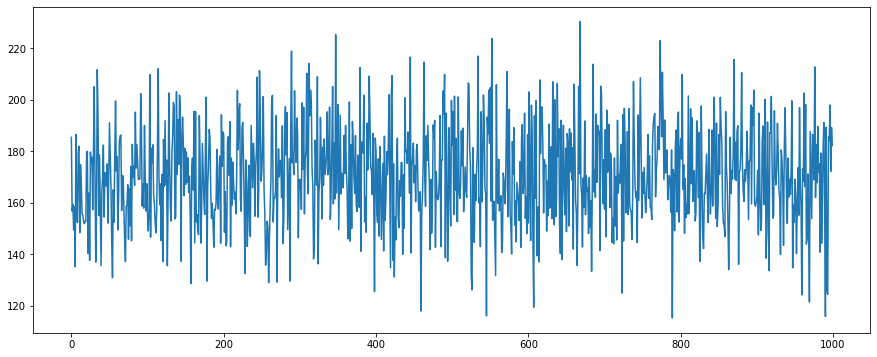

In [283]:
plt.figure(figsize = (15, 6))
plt.plot(rev)
plt.show()

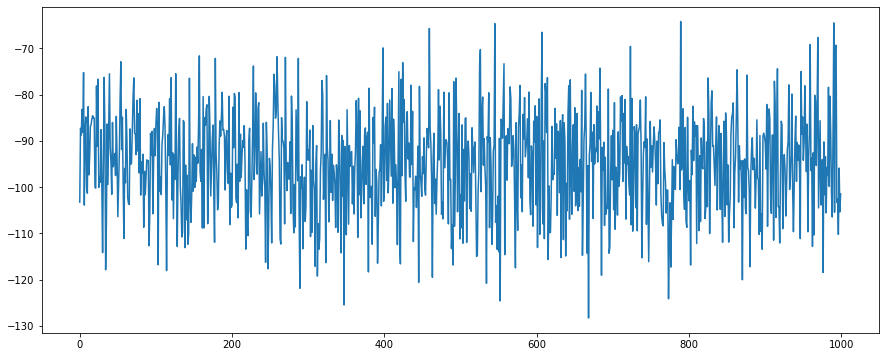

In [284]:
#cost of goods sold (money spent) and it is percentage of revenues
COGS = - (rev * np.random.normal(0.6, 0.1))

plt.figure(figsize = (15, 6))
plt.plot(COGS)
plt.show()

In [285]:
COGS.mean()

-94.92834527615457

In [286]:
COGS.std()

10.747195249231748

### Monte carlo Predicting Gross Profit PART II

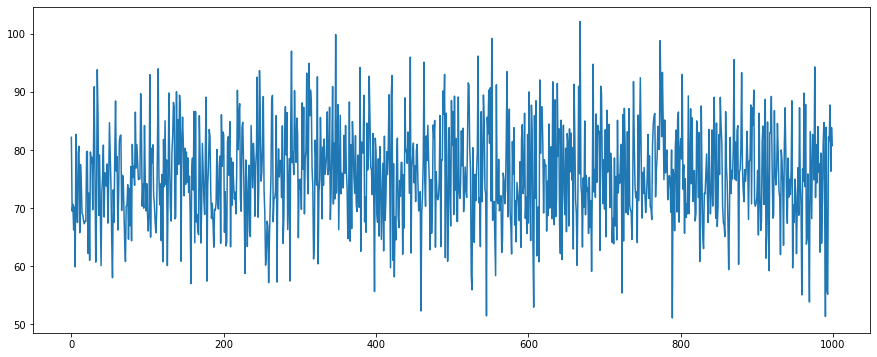

In [288]:
gross_profit = rev + COGS


plt.figure(figsize = (15, 6))
plt.plot(gross_profit)
plt.show()

In [289]:
max(gross_profit)

102.12738029691454

In [290]:
min(gross_profit)

51.06398665931279

In [291]:
gross_profit.mean()

75.56113540427961

In [292]:
gross_profit.std()

8.554560527533157

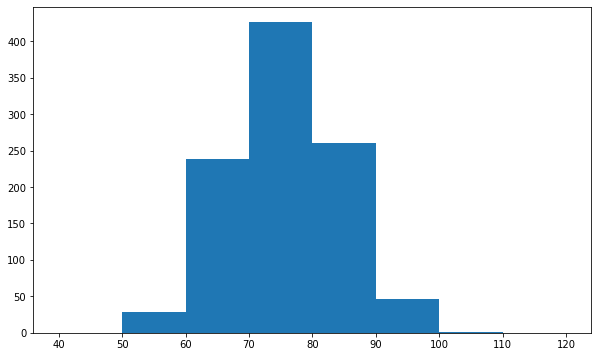

In [293]:
plt.figure(figsize = (10, 6))
plt.hist(gross_profit, bins = [40, 50, 60, 70, 80, 90, 100, 110, 120]);
plt.show()

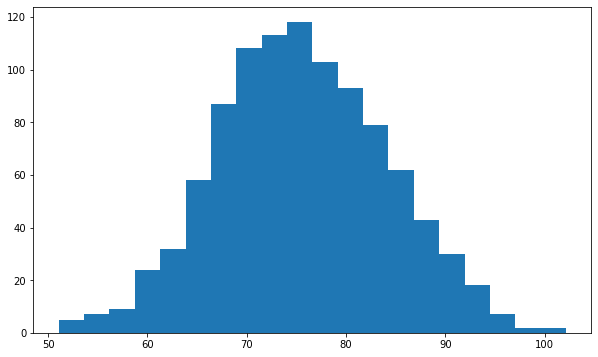

In [294]:
plt.figure(figsize = (10, 6))
plt.hist(gross_profit, bins = 20);
plt.show()

### Monte carlo Forecasting Stock prices PART I

In [295]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline



In [296]:
ticker = "PG"
data = pd.DataFrame()


data[ticker]= wb.DataReader(ticker, data_source = "yahoo", start = "2007-1-1")["Adj Close"] 

In [297]:
#pct_change is function which calculate the same daily or annual return automatically
log_returns = np.log(1 + data.pct_change())

In [298]:
log_returns.tail()

,PG
Date,
2022-10-31,-0.004076
2022-11-01,0.001558
2022-11-02,-0.014488
2022-11-03,-0.006869
2022-11-04,0.018089


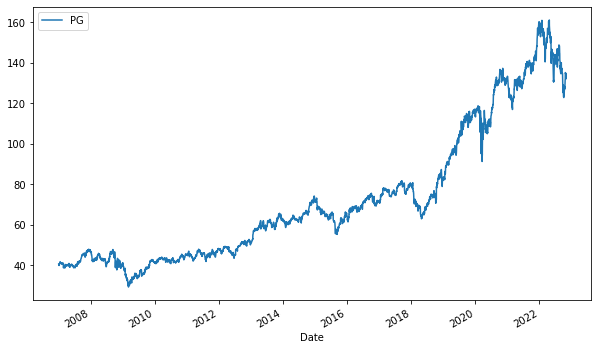

In [299]:
data.plot(figsize = (10, 6));

<AxesSubplot:xlabel='Date'>

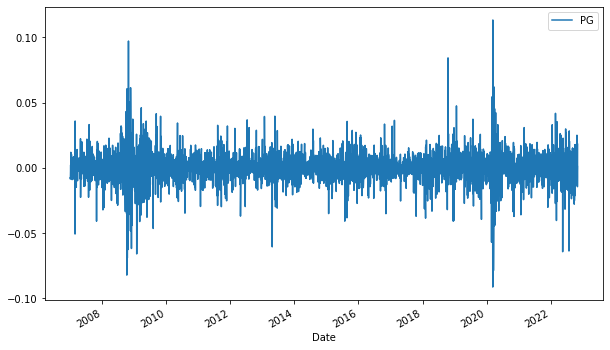

In [300]:
log_returns.plot(figsize=(10, 6))

In [301]:
# BROWNIAN motion is r = drift + stdev * e^r
u = log_returns.mean()
u

PG    0.0003
dtype: float64

In [302]:
var = log_returns.var()
var

PG    0.000141
dtype: float64

In [303]:
drift = u - (0.5 * var)
drift

PG    0.00023
dtype: float64

In [305]:
stdev = log_returns.std()
stdev

PG    0.011879
dtype: float64

### Monte carlo Forecasting Stock prices PART II

In [306]:
type(drift)

pandas.core.series.Series

In [307]:
type(stdev)

pandas.core.series.Series

In [308]:
np.array(drift)

array([0.00022972])

In [309]:
drift.values

array([0.00022972])

In [310]:
stdev.values

array([0.01187857])

In [311]:
# z corresponds to the distance between the mean and the events expressed as the number of standard deviation
norm.ppf(0.95)
# the mean is 1.65 standard deviations

1.6448536269514722

In [317]:
x = np.random.rand(10, 2)
x

array([[0.05355844, 0.84575871],
       [0.42301105, 0.85464643],
       [0.02681671, 0.01057533],
       [0.051528  , 0.095852  ],
       [0.46391515, 0.55060367],
       [0.60807079, 0.9059327 ],
       [0.50529338, 0.37962166],
       [0.67979807, 0.45372866],
       [0.7551188 , 0.70403685],
       [0.5537924 , 0.99299683]])

In [314]:
norm.ppf(x)

array([[-0.74309104, -1.69449643],
       [-1.03550954, -0.25000651],
       [-1.21258797,  0.13943755],
       [-0.99770989, -1.14384252],
       [ 1.82884518,  1.26739259],
       [-1.8561214 , -1.28368852],
       [-2.39733314,  0.25265058],
       [-1.48919724,  0.94596706],
       [ 1.22818754,  0.18718364],
       [-0.70750546,  0.11052336]])

In [315]:
z = norm.ppf(np.random.rand(10, 2))
z

array([[-0.06693467, -0.77728743],
       [-0.05521177,  0.35961462],
       [-0.06733247,  0.64523742],
       [ 0.2778248 ,  3.07204692],
       [ 0.05464675,  0.19301953],
       [-0.7464392 ,  1.35183892],
       [ 0.52705587,  0.89991177],
       [ 0.58748691, -1.43790632],
       [ 0.17707736, -1.13145715],
       [-0.14018465,  1.7051586 ]])

In [316]:
t_intervals = 1000
iterations = 10

In [319]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [321]:
#random stock prices 1000 rows and 10 columns
daily_returns

array([[0.98537909, 0.99881097, 0.99559249, ..., 1.00164762, 1.00763784,
        1.00334979],
       [0.98827923, 1.0204336 , 0.98221919, ..., 0.99484254, 1.0169108 ,
        1.01583313],
       [0.99075402, 0.99970823, 1.00691841, ..., 0.98057599, 0.99647694,
        1.00653224],
       ...,
       [1.01322469, 1.003115  , 1.00858684, ..., 0.98867762, 1.02243742,
        0.97547391],
       [0.99683423, 0.9770287 , 1.00624125, ..., 0.96548749, 1.01114373,
        0.98883067],
       [1.00367203, 0.99515505, 0.97427758, ..., 1.00045053, 0.99602156,
        0.99712851]])

### Monte carlo Forecasting Stock prices PART III

In [323]:
# we take the last current price of a stock (not a random stock price) as initial price
S0 =data.iloc[-1]
S0

PG    134.440002
Name: 2022-11-04 00:00:00, dtype: float64

In [325]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [327]:
price_list[0] = S0
price_list

array([[134.44000244, 134.44000244, 134.44000244, ..., 134.44000244,
        134.44000244, 134.44000244],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [330]:
# we create 10 different options for future price
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

price_list

array([[134.44000244, 134.44000244, 134.44000244, ..., 134.44000244,
        134.44000244, 134.44000244],
       [132.86426173, 137.18709593, 132.04954967, ..., 133.74663327,
        136.71349014, 136.56860914],
       [131.63580204, 137.1470685 , 132.9631224 , ..., 131.14873697,
        136.23183986, 137.46070806],
       ...,
       [269.38679993, 152.34777207, 200.38374345, ..., 244.54709083,
        160.77862081,  87.57682093],
       [268.53398369, 148.8481451 , 201.63438834, ..., 236.1071566 ,
        162.57029363,  86.59864629],
       [269.52004832, 148.12698373, 196.44786351, ..., 236.21353102,
        161.92351824,  86.34997949]])

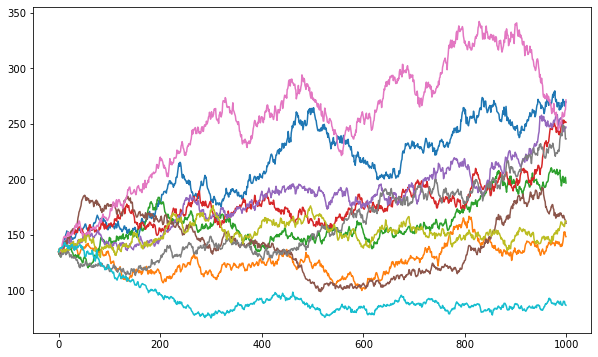

In [331]:
plt.figure(figsize=(10,6))
plt.plot(price_list)

### Monte carlo Black Sholes Merton 

In [332]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline


In [333]:
#Create d1 and d2 functions for Black Sholes formula
def d1(S, K, r, stdev, T):
    return (np.log(S / K) + (r + stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

def d2(S, K, r, stdev, T):
    return (np.log(S / K) + (r - stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

In [334]:
#Cumulative distribution, shows how the data accumulates in time
norm.cdf(0)


0.5

In [335]:
norm.cdf(0.25)

0.5987063256829237

In [336]:
norm.cdf(0.75)

0.7733726476231317

In [337]:
norm.cdf(9)

1.0

In [338]:
def BSM (S, K, r, stdev, T):
    return (S * norm.cdf(d1(S, K, r, stdev, T))) - (K * np.exp(-r * T) * norm.cdf(d2(S, K, r, stdev, T)))

In [341]:
ticker = "PG"
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source = "yahoo", start = "2007-1-1")["Adj Close"]

In [343]:
S = data.iloc[-1]
S

PG    134.440002
Name: 2022-11-04 00:00:00, dtype: float64

In [344]:
log_returns = np.log(1 + data.pct_change())

In [345]:

stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.187817
dtype: float64

In [346]:
r = 0.025
K = 110.0
T = 1

In [347]:
d1(S, K, r, stdev, T)

PG    1.29528
dtype: float64

In [348]:
d2(S, K, r, stdev, T)

PG    1.107464
dtype: float64

In [349]:
# call price
BSM(S, K, r, stdev, T)

PG    28.41407
Name: 2022-11-04 00:00:00, dtype: float64

### EULER discretization

In [350]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline


In [356]:
ticker = "PG"
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source = "yahoo", start = "2007-1-1", end = "2017-3-21")["Adj Close"]

In [357]:
log_returns = np.log(1+data.pct_change())

In [358]:
r = 0.025

In [359]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.17655
dtype: float64

In [369]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals  
iterations = 10000  

In [381]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 


S0 = data.iloc[-1]
S[0] = S0

In [382]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [383]:
S

array([[77.78138733, 77.78138733, 77.78138733, ..., 77.78138733,
        77.78138733, 77.78138733],
       [78.17424981, 77.65891865, 77.63127266, ..., 78.74992114,
        78.7139978 , 77.32011782],
       [78.63267586, 78.83997467, 78.44230372, ..., 79.63403823,
        78.94156599, 76.92282258],
       ...,
       [90.23571619, 69.24254369, 65.77627833, ..., 91.35632981,
        97.90877253, 80.05716886],
       [89.91152239, 68.90905451, 65.21808422, ..., 91.53905394,
        98.62892337, 81.04488489],
       [90.93608692, 69.33047071, 63.74113616, ..., 89.50602253,
        99.56445115, 79.76917627]])

In [384]:
S.shape

(251, 10000)

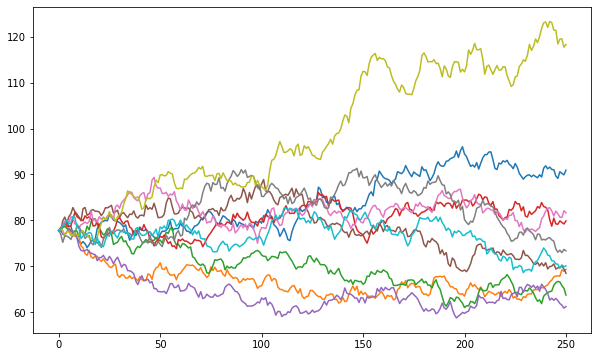

In [385]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

In [386]:
p = np.maximum(S[-1] -110, 0)

In [387]:
p

array([0., 0., 0., ..., 0., 0., 0.])

In [388]:
p.shape

(10000,)

In [389]:
import numpy as np
import pandas as pd
from scipy.stats import norm

tsla_data = pd.read_csv("C:/Users/Vartotojas/Desktop/365DSc-TSLA-2010-2020.csv", index_col = "Date")

tsla_data.head()

,TSLA
Date,
2010-06-29,4.778
2010-06-30,4.766
2010-07-01,4.392
2010-07-02,3.840
2010-07-06,3.222


TSLA    0.54261
dtype: float64

TSLA    0.114346
dtype: float64

TSLA   -0.428264
dtype: float64

TSLA    34.496527
Name: 2020-06-08, dtype: float64